## Jonathan Pedoeem HW1 ECE 471
## Professor Curro
## September 12th, 2018

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#all the good old hyperparameters.
np.random.seed(1234)
tf.set_random_seed(1234)
N = 50
sigNoise = 0.1
NUM_BATCHES= 41000
lr = 0.05
M=11

In [3]:
#doing some intialization here. the fine varieties are for better graphical images.
xi = np.sort(np.random.uniform(size=N))
ei = np.random.normal(scale=sigNoise, size=N)
sin = np.sin(2*np.pi*xi)
yi = sin + ei
xfine = np.sort(np.random.uniform(size=N*3))
sinfine =  np.sin(2*np.pi*xfine)

In [4]:
def phi(x,mu,sigma):
    return tf.exp(-tf.square(x-mu)/tf.square(sigma))

In [5]:
def f(x):
    w = tf.get_variable('w', [M, 1], tf.float32,
                         tf.random_normal_initializer())
    b = tf.get_variable('b', [], tf.float32, tf.zeros_initializer())
    mu= tf.get_variable("mu",[M,1], tf.float32, tf.random_normal_initializer())
    sigma = tf.get_variable("sigma", [M,1], tf.float32,  tf.random_normal_initializer())
    yhat =  tf.transpose(w) @ phi(x,mu,sigma) + b 
    return yhat

In [6]:
x = tf.placeholder(tf.float32, [1,1])
y = tf.placeholder(tf.float32, [1,1])
y_hat = f(x)

loss = 0.5*tf.reduce_mean(tf.pow(y-y_hat, 2))
#some automatic differentiation occuring here.
optim = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [7]:
for _ in tqdm(range(0, NUM_BATCHES)):
    #stochastic grad descent
    choice = np.random.randint(N,size=1)[0]
    x_np, y_np = np.atleast_2d(xi[choice]), np.atleast_2d(yi[choice])
    loss_np, _ = sess.run([loss, optim], feed_dict={x: x_np, y: y_np})

100%|██████████████████████████████████████████████████████████████████████████| 41000/41000 [00:28<00:00, 1420.07it/s]


In [8]:
#getting the learned variables
variables = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
learnedw = sess.run(variables[0])
learnedb = sess.run(variables[1])
learnedmu= sess.run(variables[2])
learnedsigma= sess.run(variables[3])



In [9]:
#Calculating yhat. 
yhat = []
for x in xi: 
    yhat.append(float(np.exp(-np.square(np.repeat(x,M)- np.transpose(learnedmu))/np.square(np.transpose(learnedsigma))) @ learnedw + learnedb))

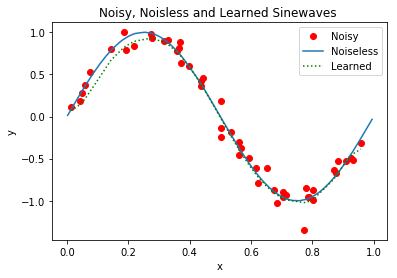

In [10]:
plt.plot(xi,yi, 'ro')
plt.plot(xfine,sinfine)
plt.plot(xi,yhat, color="green", linestyle='dotted')
plt.title("Noisy, Noisless and Learned Sinewaves ")
plt.ylabel("y")
plt.xlabel("x")
plt.legend(("Noisy", "Noiseless", "Learned"))

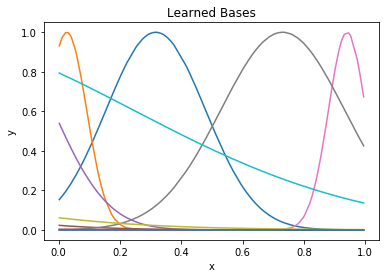

In [12]:
phis = []
plt.figure(0)
plt.title("Learned Bases")
plt.ylabel("y")
plt.xlabel("x")
for x in range(M):
    phi  = np.exp(-np.square(xfine - np.repeat(learnedmu[x],N*3))/np.square(np.repeat(learnedsigma[x],N*3)))
    plt.plot(xfine,phi)
    phis.append(phi)
